In [2]:


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import random
import pandas as pd
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [3]:
df = pd.read_csv('./tweet data/merged_df.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,#LottoFriday Watchlist: short &amp; sweet\n\n$...,"Tesla, Inc.",240,Positive,0.8478,1.487776
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063


In [5]:
df['Stock Name'].unique()

array(['TSLA', 'F', 'NIO', 'XPEV'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             48300 non-null  object 
 1   Open             48300 non-null  float64
 2   High             48300 non-null  float64
 3   Low              48300 non-null  float64
 4   Close            48300 non-null  float64
 5   Adj Close        48300 non-null  float64
 6   Volume           48300 non-null  int64  
 7   Stock Name       48300 non-null  object 
 8   Tweet            48300 non-null  object 
 9   Company Name     48300 non-null  object 
 10  Tweet Length     48300 non-null  int64  
 11  Sentiment        48300 non-null  object 
 12  Sentiment_score  48300 non-null  float64
 13  Z-Score          48300 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 5.2+ MB


In [7]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48298,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Tweet Length,Sentiment_score,Z-Score
count,48300.000000,48300.000000,48300.000000,48300.000000,48300.000000,4.830000e+04,48300.000000,48300.000000,48300.000000
mean,512.407217,526.780271,497.919163,512.778732,512.778509,6.629425e+07,159.482712,0.175720,-0.013005
std,340.458528,350.650525,330.822177,341.727166,341.727488,3.680433e+07,87.761171,0.444974,0.993645
min,11.100000,11.360000,10.930000,11.130000,10.906092,4.319000e+06,7.000000,-0.998800,-2.635757
25%,283.816681,289.500000,276.333344,283.333344,283.333344,3.347910e+07,82.000000,0.000000,-0.405396
50%,338.303345,349.480011,331.333344,339.476654,339.476654,6.398490e+07,143.000000,0.052050,-0.289167
75%,872.710022,898.880005,851.469971,870.109985,870.109985,8.917830e+07,246.000000,0.539900,0.800222
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,1.885563e+08,445.000000,0.997900,1.822955


In [10]:
df['Stock Name'].value_counts()

Stock Name
TSLA    45823
NIO      2281
XPEV      170
F          26
Name: count, dtype: int64

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,#LottoFriday Watchlist: short &amp; sweet\n\n$...,"Tesla, Inc.",240,Positive,0.8478,1.487776
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063


In [12]:
df["Pct_change"] = df["Adj Close"].pct_change()
 
# Drop null values 
df.dropna(inplace = True)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,Pct_change
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275,0.0
2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875,0.0
3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396,0.0
4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063,0.0
5,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,"♠️#LottoFriday♠️\n\nHigh risk, secure profits!...","Tesla, Inc.",291,Positive,0.8168,1.418551,0.0


In [13]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Tweet,Company Name,Tweet Length,Sentiment,Sentiment_score,Z-Score,Pct_change
0,1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,CORRECTION UPDATE\n\nUPDATE on Q3 Delivery Est...,"Tesla, Inc.",296,Neutral,-0.1531,-0.747275,0.0
1,2,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,"Tesla, Inc.",317,Positive,0.9083,1.622875,0.0
2,3,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,California DMV today issued autonomous vehicle...,"Tesla, Inc.",272,Positive,0.0000,-0.405396,0.0
3,4,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,@chamath Appreciate the clarification @chamath...,"Tesla, Inc.",196,Positive,0.4019,0.492063,0.0
4,5,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,"♠️#LottoFriday♠️\n\nHigh risk, secure profits!...","Tesla, Inc.",291,Positive,0.8168,1.418551,0.0


In [14]:
df_lstm = df.drop(['Date','Adj Close'], axis=1,inplace=True)

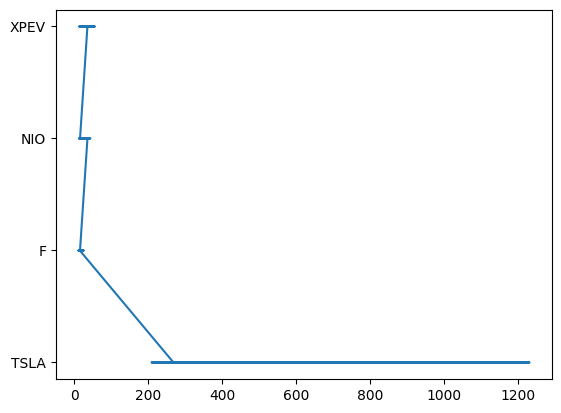

In [15]:
plt.plot(df['Close'],df['Stock Name'])

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
48294    34.3289
48295    33.9775
48296    33.6297
48297    33.3032
48298    32.9640
Name: Close, Length: 48299, dtype: float64

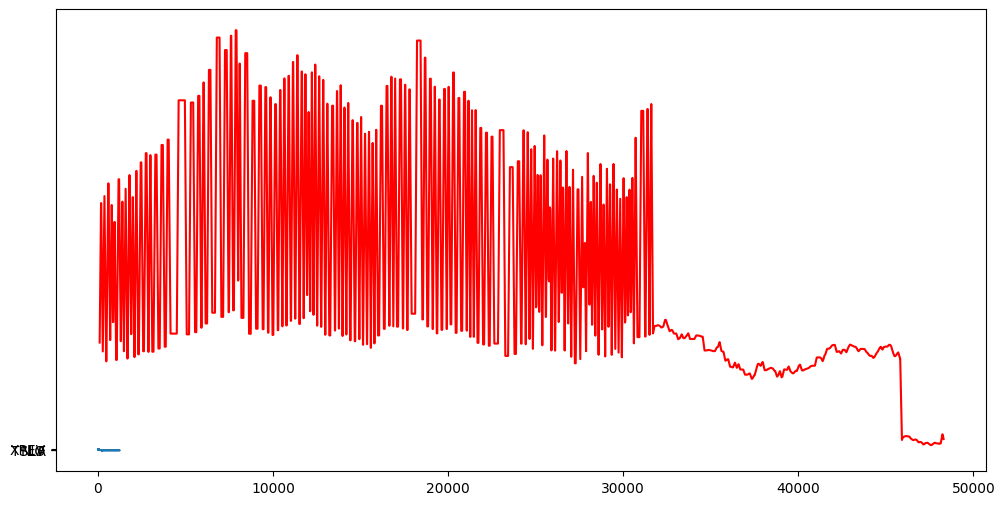

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],df['Stock Name'])
plt.plot(ma100, 'r')

In [18]:
df.shape

(48299, 14)

In [19]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [20]:
data_training.shape,data_testing.shape

((33809, 1), (14490, 1))

In [21]:
data_training.head(),data_testing.head()

(        Close
 0  258.493347
 1  258.493347
 2  258.493347
 3  258.493347
 4  258.493347,
             Close
 33809  325.733337
 33810  325.733337
 33811  325.733337
 33812  325.733337
 33813  325.733337)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00391021],
       [0.00391021],
       [0.00391021],
       ...,
       [0.07285804],
       [0.07285804],
       [0.07285804]])

In [25]:
x_train = []
y_train = []

In [26]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape,y_train.shape

((33709, 100, 1), (33709,))

In [28]:
x_train[0]

array([[0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.00391021],
       [0.003

In [29]:
y_train

array([0.53402783, 0.53402783, 0.53402783, ..., 0.07285804, 0.07285804,
       0.07285804])

In [30]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [31]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1054/1054 [==============================] - 248s 235ms/step - loss: 0.0221
Epoch 2/10
1054/1054 [==============================] - 250s 237ms/step - loss: 0.0104
Epoch 3/10
1054/1054 [==============================] - 240s 228ms/step - loss: 0.0077
Epoch 4/10
1054/1054 [==============================] - 246s 233ms/step - loss: 0.0069
Epoch 5/10
1054/1054 [==============================] - 256s 243ms/step - loss: 0.0065
Epoch 6/10
1054/1054 [==============================] - 253s 240ms/step - loss: 0.0063
Epoch 7/10
1054/1054 [==============================] - 245s 233ms/step - loss: 0.0062
Epoch 8/10
1054/1054 [==============================] - 249s 237ms/step - loss: 0.0060
Epoch 9/10
1054/1054 [==============================] - 250s 238ms/step - loss: 0.0060
Epoch 10/10
1054/1054 [==============================] - 258s 245ms/step - loss: 0.0060


In [78]:
model.save('saved_model.h5')

c:\Users\danus\miniconda3\envs\my_gpu\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [79]:
data_testing.head()

,Close
3297,45.118000
3298,44.722000
3299,44.647999
3300,44.702000
3301,45.000000


In [80]:
past_100_days = data_training.tail(100)

In [81]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.shape

(1513, 1)

In [82]:
final_df.head()

,Close
0,44.515999
1,45.549999
2,46.051998
3,46.026001
4,45.377998


In [83]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1513, 1)

In [84]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [85]:
x_test,y_test = np.array(x_test), np.array(y_test)
x_test.shape,y_test.shape

((1413, 100, 1), (1413,))

In [86]:
x_test

array([[[0.00730415],
        [0.00817006],
        [0.00859045],
        ...,
        [0.00781834],
        [0.00769439],
        [0.00781164]],

       [[0.00817006],
        [0.00859045],
        [0.00856868],
        ...,
        [0.00769439],
        [0.00781164],
        [0.00780829]],

       [[0.00859045],
        [0.00856868],
        [0.00802602],
        ...,
        [0.00781164],
        [0.00780829],
        [0.00747666]],

       ...,

       [[0.83916969],
        [0.87198062],
        [0.90293235],
        ...,
        [0.69993698],
        [0.7282341 ],
        [0.74144049]],

       [[0.87198062],
        [0.90293235],
        [0.98214573],
        ...,
        [0.7282341 ],
        [0.74144049],
        [0.80242284]],

       [[0.90293235],
        [0.98214573],
        [0.95150385],
        ...,
        [0.74144049],
        [0.80242284],
        [0.80671891]]])

In [87]:
y_predict = model.predict(x_test)

45/45 [==============================] - 3s 55ms/step


In [88]:
y_predict

array([[0.03780586],
       [0.03776565],
       [0.03771469],
       ...,
       [0.6903047 ],
       [0.72442025],
       [0.7478551 ]], dtype=float32)

In [89]:
y_predict_inveres = scaler.inverse_transform(y_predict)

In [90]:
y_predict_inveres

array([[ 80.93858],
       [ 80.89057],
       [ 80.82971],
       ...,
       [860.0979 ],
       [900.8358 ],
       [928.81976]], dtype=float32)

In [91]:
scale_factor = 1/ scaler.scale_[0]

Text(0, 0.5, 'Price')

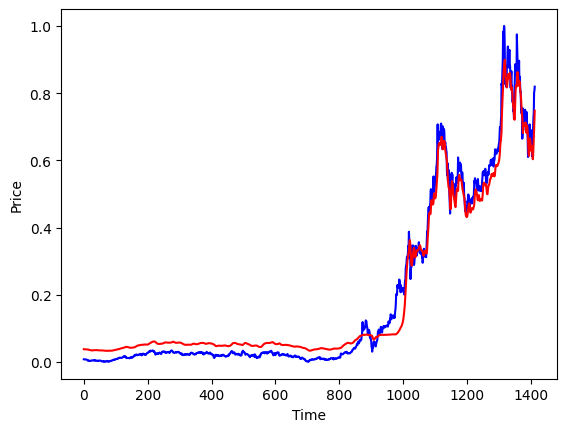

In [92]:
plt.plot(y_test,'b',label = 'original price')
plt.plot(y_predict,'r',label = 'predicted price')
plt.xlabel('Time')  
plt.ylabel('Price')

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test, y_predict)
print(f'Mean Absolute Error: {mae:.4f}')
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error: {mse:.4f}')


Mean Absolute Error: 0.0323
Mean Squared Error: 0.0014


In [23]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update_layout(title_text="Automobile Stock Price and Volume")
fig.update(layout_xaxis_rangeslider_visible=False) 
fig.show()

In [37]:
df = df[(df["Volume"] > 0) & (df["Close"] < df["Close"].rolling(10).mean()*2)]
df["TurnOver"] = df["Close"]*df["Volume"]
print(df.shape)
df.head(5)

(4710, 10)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Pct_change,TurnOver
10,2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700,TSLA,-0.071668,2.256506e+10
11,2022-11-10,189.899994,191.000000,180.029999,190.720001,190.720001,132703000,TSLA,0.073934,2.530912e+10
12,2022-11-11,186.000000,196.520004,182.589996,195.970001,195.970001,114403600,TSLA,0.027527,2.241967e+10
13,2022-11-14,192.770004,195.729996,186.339996,190.949997,190.949997,92226600,TSLA,-0.025616,1.761067e+10
14,2022-11-15,195.880005,200.820007,192.059998,194.419998,194.419998,91293800,TSLA,0.018172,1.774934e+10


In [45]:
turnover = df[["TurnOver"]].unstack().T
turnover.index = turnover.index.get_level_values(1)
turnover = turnover.sort_index()
turnover = turnover.dropna().ffill().dropna()
turnover.head(5)

10    2.256506e+10
11    2.530912e+10
12    2.241967e+10
13    1.761067e+10
14    1.774934e+10
dtype: float64

In [44]:
volume = df[["Volume"]].unstack().T
volume.index = volume.index.get_level_values(1)
volume = volume.sort_index()
volume = volume.dropna().ffill().dropna()
volume.head(5)

10    127062700
11    132703000
12    114403600
13     92226600
14     91293800
dtype: int64

In [50]:
target_stocks = turnover.mean()
target_stocks


6636527927.751818

In [31]:

auto_df = df[["Date", "Adj Close", "Volume","Stock Name"]]
auto_df.head()

,Date,Adj Close,Volume,Stock Name
0,2022-10-26,224.639999,85012500,TSLA
1,2022-10-27,225.089996,61638800,TSLA
2,2022-10-28,228.520004,69152400,TSLA
3,2022-10-31,227.539993,61554300,TSLA
4,2022-11-01,227.820007,62688800,TSLA


In [32]:
auto_df = auto_df.set_index('Date')
auto_df

,Adj Close,Volume,Stock Name
Date,,,
2022-10-26,224.639999,85012500,TSLA
2022-10-27,225.089996,61638800,TSLA
2022-10-28,228.520004,69152400,TSLA
2022-10-31,227.539993,61554300,TSLA
2022-11-01,227.820007,62688800,TSLA
...,...,...,...
2022-03-18,905.390015,33408500,TSLA
2022-03-21,921.159973,27327200,TSLA
2022-03-22,993.979980,35289500,TSLA


In [33]:
#Stock Trend based on difference between current price to previous day price and coverting them to '0' as fall and '1' as rise in stock price

auto_df["PriceDiff"] = auto_df["Adj Close"].diff()
auto_df.dropna(inplace=True)
auto_df["Trend"] = np.where(auto_df["PriceDiff"] > 0, 1, 0)

auto_df

,Adj Close,Volume,Stock Name,PriceDiff,Trend
Date,,,,,
2022-10-27,225.089996,61638800,TSLA,0.449997,1
2022-10-28,228.520004,69152400,TSLA,3.430008,1
2022-10-31,227.539993,61554300,TSLA,-0.980011,0
2022-11-01,227.820007,62688800,TSLA,0.280014,1
2022-11-02,214.979996,63070300,TSLA,-12.840011,0
...,...,...,...,...,...
2022-03-18,905.390015,33408500,TSLA,33.790039,1
2022-03-21,921.159973,27327200,TSLA,15.769958,1
2022-03-22,993.979980,35289500,TSLA,72.820007,1


In [97]:
ano_df = pd.read_csv('automobile_stocks.csv')

In [101]:
ano_df1 = ano_df.set_index([ "Date"])
ano_df1 = ano_df1[(ano_df1["Volume"] > 0) & (ano_df1["Close"] < ano_df1["Close"].rolling(10).mean()*2)]
ano_df1["TurnOver"] = ano_df1["Close"]*ano_df1["Volume"]
print(ano_df1.shape)
ano_df1.head(5)

(4711, 8)


,Open,High,Low,Close,Adj Close,Volume,Stock Name,TurnOver
Date,,,,,,,,
2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400,TSLA,2.464009e+10
2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700,TSLA,2.256506e+10
2022-11-10,189.899994,191.000000,180.029999,190.720001,190.720001,132703000,TSLA,2.530912e+10
2022-11-11,186.000000,196.520004,182.589996,195.970001,195.970001,114403600,TSLA,2.241967e+10
2022-11-14,192.770004,195.729996,186.339996,190.949997,190.949997,92226600,TSLA,1.761067e+10
